# Manejo de Series con modelos basicos en Python

Python es una excelente herramienta para el análisis de series de tiempo, gracias a bibliotecas como `pandas` para manipulación de datos, `statsmodels` para modelado estadístico, y `matplotlib` para visualización. Aquí te muestro cómo manejar las descomposiciones aditivas y multiplicativas de series de tiempo en Python.

#### Preparación del Entorno

Primero, necesitas instalar las bibliotecas necesarias, si aún no están instaladas:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression

## Modelo Aditivo
#### Cargar y Preparar Datos

Supongamos que tienes un conjunto de datos de series temporales almacenado en un archivo CSV. Aquí está cómo cargarlo y prepararlo:

In [ ]:
# Crear una secuencia de fechas mensuales desde julio de 2023
fechas = pd.date_range(start='2023-07-01', periods=36, freq='M')

# Serie de datos de bebidas despachadas por mes
bebidas_despachadas = [
    9, 13, 15, 14, 15, 17, 20, 25, 18, 16, 15, 14,
    14, 16, 17, 16, 18, 21, 24, 28, 22, 20, 16, 15,
    15, 16, 18, 18, 20, 23, 27, 31, 24, 23, 18, 17
]

# Crear el DataFrame
df = pd.DataFrame({'Fecha': fechas, 'Bebidas_despachadas': bebidas_despachadas})

# Mostrar el DataFrame
print(df)


        Fecha  Bebidas_despachadas
0  2023-07-31                    9
1  2023-08-31                   13
2  2023-09-30                   15
3  2023-10-31                   14
4  2023-11-30                   15
5  2023-12-31                   17
6  2024-01-31                   20
7  2024-02-29                   25
8  2024-03-31                   18
9  2024-04-30                   16
10 2024-05-31                   15
11 2024-06-30                   14
12 2024-07-31                   14
13 2024-08-31                   16
14 2024-09-30                   17
15 2024-10-31                   16
16 2024-11-30                   18
17 2024-12-31                   21
18 2025-01-31                   24
19 2025-02-28                   28
20 2025-03-31                   22
21 2025-04-30                   20
22 2025-05-31                   16
23 2025-06-30                   15
24 2025-07-31                   15
25 2025-08-31                   16
26 2025-09-30                   18
27 2025-10-31       

In [ ]:
# Obtener un resumen del DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Fecha                36 non-null     datetime64[ns]
 1   Bebidas_despachadas  36 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 704.0 bytes
None


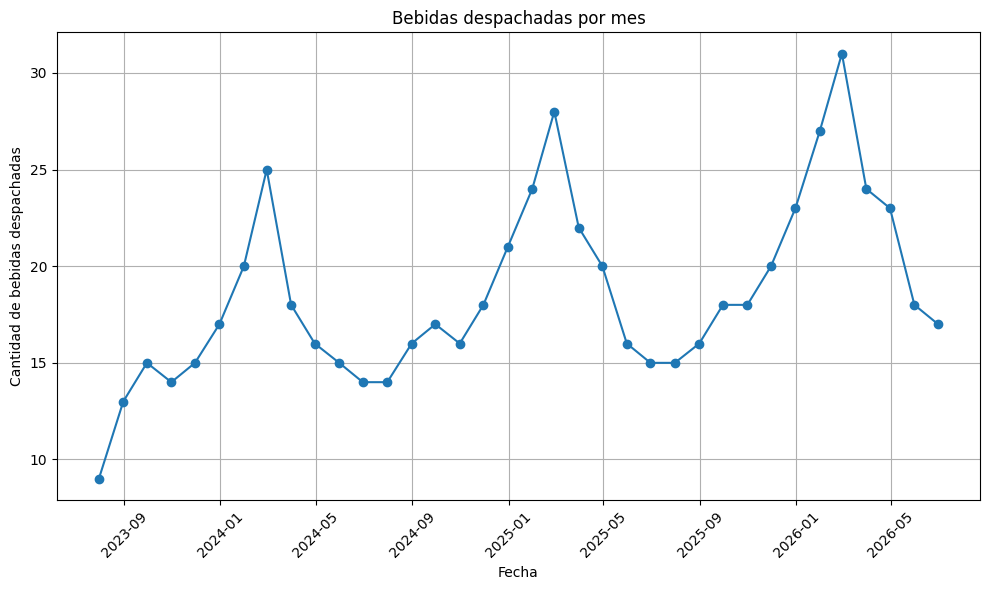

In [ ]:

# Crear el gráfico de la serie de tiempo
plt.figure(figsize=(10, 6))
plt.plot(df['Fecha'], df['Bebidas_despachadas'], marker='o', linestyle='-')
plt.title('Bebidas despachadas por mes')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de bebidas despachadas')
plt.grid(True)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.tight_layout()

# Mostrar el gráfico
plt.show()


### Descomposición de Series de Tiempo

#### Modelo Aditivo

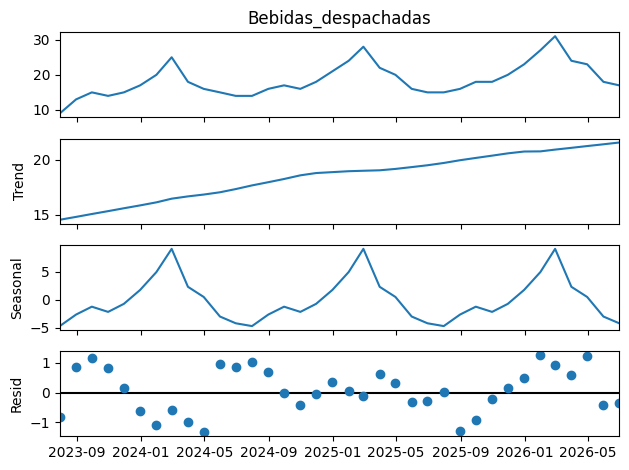

In [ ]:
# Convertir el índice del DataFrame a tipo DatetimeIndex
df.index = pd.to_datetime(df['Fecha'])
df.drop(columns=['Fecha'], inplace=True)  # Eliminar la columna 'Fecha' ya que ahora es el índice

# Descomposición del modelo aditivo
result_aditivo = seasonal_decompose(df['Bebidas_despachadas'], model='aditive', extrapolate_trend='freq')

# Plot de las componentes
result_aditivo.plot()
plt.show()



### 1. Predicción de Componentes Individualmente

Esta técnica implica extrapolar cada componente descompuesto (tendencia, estacionalidad) y luego combinar los resultados según sea aditivo o multiplicativo.

#### Predicción de la Tendencia

Supongamos que usas un modelo lineal simple para la tendencia:

In [ ]:
# Preparar los datos
trend = result_aditivo.trend.dropna()  # Asegúrate de eliminar NaN
X = np.arange(len(trend)).reshape(-1, 1)
y = trend.values

# Ajustar el modelo lineal
model = LinearRegression().fit(X, y)

# Predecir hacia adelante, por ejemplo, 24 pasos adelante
X_predict = np.arange(len(trend), len(trend) + 24).reshape(-1, 1)
trend_pred = model.predict(X_predict)

#### Aplicación de la Estacionalidad

Para la estacionalidad, puedes simplemente repetir el último patrón estacional conocido:

In [ ]:
monthly_seasonal_means = result_aditivo.seasonal.groupby(df.index.month).mean()

# Preparar la estacionalidad para la predicción
seasonal_pred = np.tile(monthly_seasonal_means, 2)[0:24]


Combinación de Predicciones
Si estás utilizando un modelo aditivo:

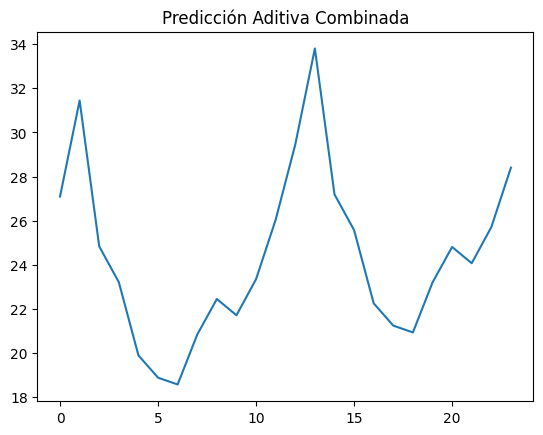

In [ ]:
final_pred_add = trend_pred + seasonal_pred
plt.plot(final_pred_add)
plt.title('Predicción Aditiva Combinada')
plt.show()


## **Multiplicativo**

Extraemos la informacion y lo almacenamos en un dataframe
obs: se pone el sep porque sino de manera automatica los separa con comas los valores de las columnas, pero dentro de la data las comas son comas decimales

In [ ]:
ruta_multiplicativo="/content/sample_data/preciopm.csv"
df2=pd.read_csv(ruta_multiplicativo,sep=" ")
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   precio  352 non-null    object
dtypes: object(1)
memory usage: 2.9+ KB
None


 Se reemplazan las comas por puntos en los valores de la columna "precio"
 y se convierten los valores a tipo numérico, asignando NaN a los errores.

In [ ]:
df2["precio"]=df2["precio"].str.replace(",",".")
df2["precio"]=pd.to_numeric(df2["precio"],errors="coerce")

In [ ]:
df2

,precio
0,14.897350
1,13.856284
2,12.298178
3,10.927095
4,10.452086
...,...
347,51.868669
348,54.056660
349,57.379810
350,59.464492


se convierte los indices a datatime

In [ ]:
df2.index = pd.date_range('1990-01', periods=len(df2), freq='M')
df2

,precio
1990-01-31,14.897350
1990-02-28,13.856284
1990-03-31,12.298178
1990-04-30,10.927095
1990-05-31,10.452086
...,...
2018-12-31,51.868669
2019-01-31,54.056660
2019-02-28,57.379810
2019-03-31,59.464492


Graficamos la serie de timepo para ver su distribucion

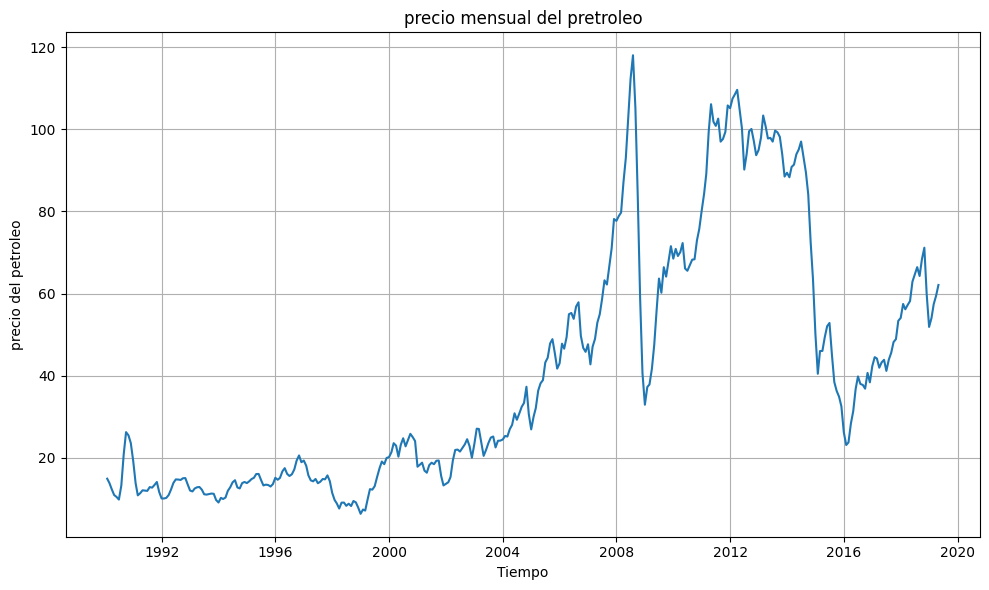

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df2['precio'], linestyle='-')
plt.title('precio mensual del pretroleo')
plt.xlabel('Tiempo')
plt.ylabel('precio del petroleo')
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

usamos el seasonal_decompose con el modelo "multiplicative" ya que se ve que al aumentar el tiempo la varianza cambia

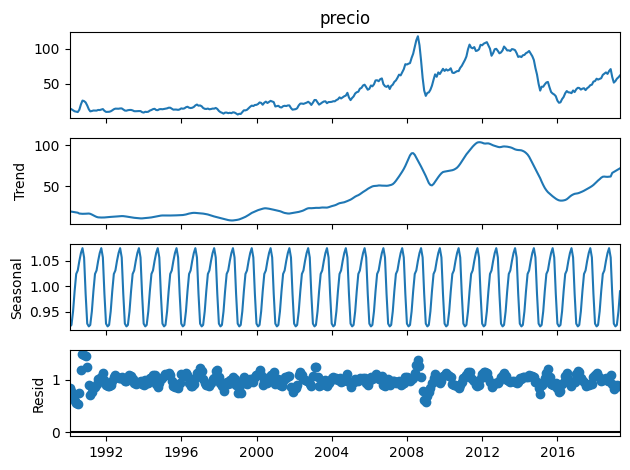

In [ ]:
result_mult=seasonal_decompose(df2['precio'], model='multiplicative', extrapolate_trend='freq')
result_mult.plot()
plt.show()

Realizamos las predicciones de la misma manera que en el aditivo solo que esta ves los valores reales ya no son la suma del estacional y de la tendencia, sino de de la multiplicacion de ambos

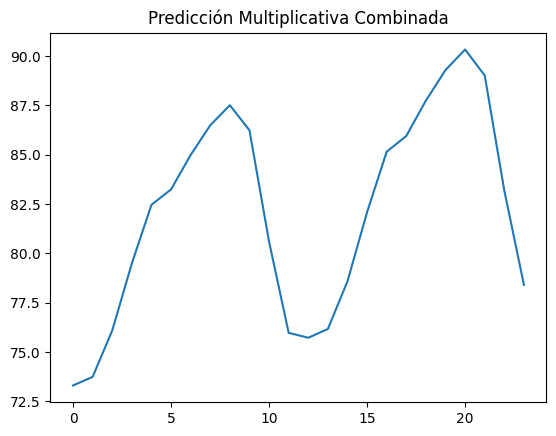

In [ ]:

# Preparar los datos
trend_mult = result_mult.trend.dropna()  # Asegúrate de eliminar NaN
X_mult = np.arange(len(trend_mult)).reshape(-1, 1)
y_mult = trend_mult.values

# Ajustar el modelo lineal
model_mult = LinearRegression().fit(X_mult, y_mult)

# Predecir hacia adelante, por ejemplo, 24 pasos adelante
X_predict_mult = np.arange(len(trend_mult), len(trend_mult) + 24).reshape(-1, 1)
trend_pred_mult = model_mult.predict(X_predict_mult)

# Preparar la estacionalidad para la predicción
monthly_seasonal_means_mult = result_mult.seasonal.groupby(df2.index.month).mean()
seasonal_pred_mult = np.tile(monthly_seasonal_means_mult, 2)[0:24]

# Combinación de Predicciones
# Si estás utilizando un modelo multiplicativo:
final_pred_mult = trend_pred_mult * seasonal_pred_mult
plt.plot(final_pred_mult)
plt.title('Predicción Multiplicativa Combinada')
plt.show()


Realizamos la prediccion pero ahora pasando del multiplicativo al aditivo con logaritmo para la estacional y estabilizar la varianza

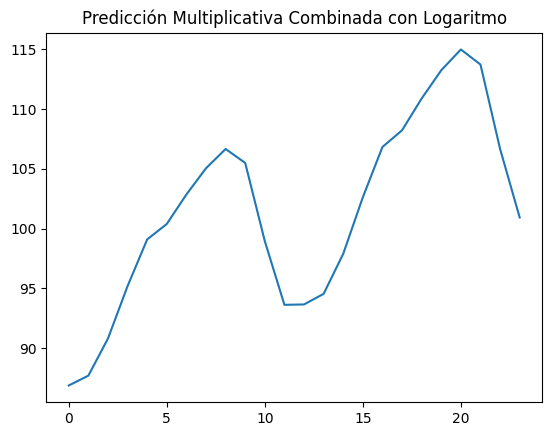

In [ ]:

# Preparar los datos
trend_mult_log = np.log(result_mult.trend.dropna())  # Asegúrate de eliminar NaN
X_mult_log = np.arange(len(trend_mult_log)).reshape(-1, 1)
y_mult_log = trend_mult_log.values

# Ajustar el modelo lineal
model_mult_log = LinearRegression().fit(X_mult_log, y_mult_log)

# Predecir hacia adelante, por ejemplo, 24 pasos adelante
X_predict_mult_log = np.arange(len(trend_mult_log), len(trend_mult_log) + 24).reshape(-1, 1)
trend_pred_mult_log = np.exp(model_mult_log.predict(X_predict_mult_log))

# Preparar la estacionalidad para la predicción
monthly_seasonal_means_mult_log = np.log(result_mult.seasonal.groupby(df2.index.month).mean())
seasonal_pred_mult_log = np.tile(monthly_seasonal_means_mult_log, 2)[0:24]

# Combinación de Predicciones
# Si estás utilizando un modelo multiplicativo:
final_pred_mult_log = trend_pred_mult_log * np.exp(seasonal_pred_mult_log)
plt.plot(final_pred_mult_log)
plt.title('Predicción Multiplicativa Combinada con Logaritmo')
plt.show()
